#TRABALHO FINAL - GRUPO 03
1. Disciplina: Data Analytics Hand's On
2. Integrantes:

*   Leandro Ariel Caputo
*   Matheus Oliveira
*   Loyanne Cristina Lemos Rabelo
*   Victor Miranda Bulhosa


##APRESENTAÇÃO DOS DADOS E OBJETIVO DO TRABALHO

Link para a base de dados: https://www.kaggle.com/arashnic/marketing-seris-customer-lifetime-value

Aplicação de Regressão : Predição de CLV - Customer Lifetime Value para uma Companhia de Seguros de Veículos

---

O Customer Lifetime Value (CLV) consiste em uma métrica que reflete a margem de lucro que uma empresa espera obter ao longo de todo relacionamento comercial com seu cliente em um período determinado de tempo. O Customer Lifetime Value deve levar em conta os custos de aquisição do cliente (CAC), as despesas contínuas de vendas e marketing, despesas operacionais e, claro, o custo necessário para fabricar o produto e/ou os serviços que a empresa está prestando. É uma métrica importante, uma vez que custa menos para uma empresa manter seus clientes existentes do que adquirir novos clientes. Dessa forma, aumentar o valor dos clientes existentes é uma boa forma de direcionar o crescimento. O conhecimento do CLV auxilia a direção do negócio a desenvolver estratégias para adquirir novos clientes e reter os existentes, mantendo as margens de lucro.É então uma métrica que todas as empresas devem considerar para planejar o seu crescimento futuro e implementar estratégias para fomentar a sua rentabilidade, especialmente pelo custo de retenção do cliente existente.

Neste trabalho será utilizada uma base de dados disponível no Kaggle que consiste em dados de marketing de uma companhia de seguro de veículos que permite utilizar técnicas de regressão para determinar a varável alvo “Customer Lifetime Value”. Adicionalmente os dados disponíveis podem ser utilizados para um modelo de clustering a fim de avaliar segmentação de clientes.



##Importação das Bibliotecas Utilizadas no Notebook

In [ ]:
import time
import numpy as np
import pandas as pd
pd.set_option("display.precision", 2)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import LabelBinarizer
# import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split #função para fazer hold-out
from sklearn.model_selection import cross_val_score #função para fazer cross-validation
from sklearn.model_selection import GridSearchCV #função para encontrar melhores parâmetros de algoritmo de classificação
from sklearn.metrics import classification_report # metricas de validação
from sklearn.neighbors import KNeighborsClassifier #função para algoritmo KNN
from sklearn.linear_model import LogisticRegression
from sklearn import tree #função para algoritmo Árvore de Decisão
from sklearn.ensemble import RandomForestClassifier #função para algoritmo Random Forest
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
pip install yellowbrick --upgrade

     |████████████████████████████████| 271 kB 4.9 MB/s 
  Attempting uninstall: yellowbrick
    Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1


In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from matplotlib import cm

In [ ]:
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

## ANÁLISE EXPLORATÓRIA DOS DADOS

In [ ]:
#Carregando a base de treinamento
df = pd.read_csv('squark_automotive_CLV_training_data.csv',sep=",",encoding = "ISO-8859-1")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       8099 non-null   object 
 1   State                          8099 non-null   object 
 2   Customer Lifetime Value        8099 non-null   float64
 3   Response                       8099 non-null   object 
 4   Coverage                       8099 non-null   object 
 5   Education                      8099 non-null   object 
 6   Effective To Date              8099 non-null   object 
 7   EmploymentStatus               8099 non-null   object 
 8   Gender                         8099 non-null   object 
 9   Income                         8099 non-null   float64
 10  Location Code                  8099 non-null   object 
 11  Marital Status                 8099 non-null   object 
 12  Monthly Premium Auto           8099 non-null   f

In [ ]:
df[df.isnull()==True].head(3)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A base de dados possui 24 atributos e 9134 instâncias. Porém, para todos os atributos o número de valores não nulos é de 8099. Um slice com uma amostra desses valores nulos nos dá a impressão que correspondem a casos onde a instância inteira está com todos os atributos nulos. Dessa forma, será utilizado o método dropna com o argumento how = all para descartar essas instâncias.

In [ ]:
df.dropna(how='all',inplace=True)

In [ ]:
df.head().T

,0,1,2,3,4
Customer,BU79786,QZ44356,AI49188,WW63253,HB64268
State,Washington,Arizona,Nevada,California,Washington
Customer Lifetime Value,2.8e+03,7e+03,1.3e+04,7.6e+03,2.8e+03
Response,No,No,No,No,No
Coverage,Basic,Extended,Premium,Basic,Basic
Education,Bachelor,Bachelor,Bachelor,Bachelor,Bachelor
Effective To Date,2/24/2011,1/31/2011,2/19/2011,1/20/2011,2/3/2011
EmploymentStatus,Employed,Unemployed,Employed,Unemployed,Employed
Gender,F,F,F,M,M
Income,5.6e+04,0,4.9e+04,0,4.4e+04


Os atributos presentes na base são:


* Customer: código de identificação do cliente                 
* State: estado de residência do cliente                     
* Customer Lifetime Value: CLV (é a variável alvo do trabalho)
* Response: resposta à oferta de renovação da apólice (???)
* Coverage: tipo de cobertura do seguro                  
* Education: nível de educação formal do cliente
* Effective To Date: data de vigência da apólice (???)            
* EmploymentStatus: situação de emprego do cliente         
* Gender: gênero do cliente
* Income: renda do cliente      
* Location Code: tipo de localização da residência do cliente             
* Marital Status: estado civil do cliente
* Monthly Premium Auto: valor do prêmio mensal da apólice
* Months Since Last Claim: meses a partir do último requerimento / sinistro
* Months Since Policy Inception: meses a partir do início da apólice
* Number of Open Complaints: número de requerimentos abertos
* Number of Policies: número de apólices
* Policy Type: tipo de apólice
* Policy: categoria da apólice
* Renew Offer Type: tipo de oferta de renovação             
* Sales Channel: canal de venda                  
* Total Claim Amount: valor do requerimento / sinistro  
* Vehicle Class: classe do veículo
* Vehicle Size: tipo do veículo

A base possui 8 atributos que podem ser considerados numéricos. Destes, 4 podem ser mantidos como float e os outros 4 podem ser convertidos para inteiro:

* Float: 'Customer Lifetime Value', 'Income', 'Monthly Premium Auto' e 'Total Claim Amount'
* Inteiro: 'Months Since Last Claim,	'Months Since Policy Inception',	'Number of Open Complaints',	'Number of Policies'

A base possui 14 atributos categóricos. Todos não ordinais.

O atributo 'Effective To Date' será convertido para formato de data.

Customer Lifetime Value: é o atributo alvo do modelo de regressão preditivo que será desenvolvido mais adiante e é do tipo float64.

In [ ]:
#Modificando o nome dos atributos:
df.columns=['cliente', 'estado', 'clv', 'resposta', 'cobertura', 'educacao', 'data_efetiva',
       'emprego', 'genero', 'renda', 'local','est_civil','premio','meses_claim','meses_inicio',
       'num_claims','num_apolice','tipo_apolice','classe_apolice','oferta','canal','valor_claim','classe_veiculo','tam_veiculo']

#Conversão dos Tipos de Atributos
numericos_float = ['clv','renda','premio','valor_claim']
numericos_int = ['meses_claim',	'meses_inicio',	'num_claims',	'num_apolice']
numericos = numericos_float + numericos_int
categoricos = ['estado','resposta','cobertura','educacao','emprego','genero','local','est_civil','tipo_apolice',
               'classe_apolice','oferta','canal','classe_veiculo', 'tam_veiculo']

df[categoricos] = df[categoricos].astype('category')
df[numericos_int] = df[numericos_int].astype('int64')
df.data_efetiva = pd.to_datetime(df.data_efetiva)

df_EDA = df.copy()

In [ ]:
df_EDA.head(3)

,cliente,estado,clv,resposta,cobertura,educacao,data_efetiva,emprego,genero,renda,local,est_civil,premio,meses_claim,meses_inicio,num_claims,num_apolice,tipo_apolice,classe_apolice,oferta,canal,valor_claim,classe_veiculo,tam_veiculo
0,BU79786,Washington,2763.52,No,Basic,Bachelor,2011-02-24,Employed,F,56274.0,Suburban,Married,69.0,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.81,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.54,No,Extended,Bachelor,2011-01-31,Unemployed,F,0.0,Suburban,Single,94.0,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.46,Four-Door Car,Medsize
2,AI49188,Nevada,12887.43,No,Premium,Bachelor,2011-02-19,Employed,F,48767.0,Suburban,Married,108.0,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.47,Two-Door Car,Medsize


### Análise Univariada

#### Atributos Numéricos

Na análise univariada dos atributos numéricos será verificada a distribuição desses dados através de medidas de tendência central e dispersão e gráficos como histogramas e boxplots.

In [ ]:
df_EDA[numericos].describe()

,clv,renda,premio,valor_claim,meses_claim,meses_inicio,num_claims,num_apolice
count,8099.00,8099.00,8099.00,8099.00,8099.00,8099.00,8099.00,8099.00
mean,7981.27,37843.54,93.14,431.46,15.07,48.15,0.39,2.96
std,6847.29,30370.56,34.38,286.71,10.09,27.82,0.91,2.39
min,1898.01,0.00,61.00,0.10,0.00,0.00,0.00,1.00
25%,3974.50,0.00,68.00,269.48,6.00,25.00,0.00,1.00
50%,5780.18,34430.00,83.00,383.17,14.00,48.00,0.00,2.00
75%,8963.29,62459.50,109.00,547.20,23.00,71.00,0.00,4.00
max,83325.38,99981.00,298.00,2893.24,35.00,99.00,5.00,9.00


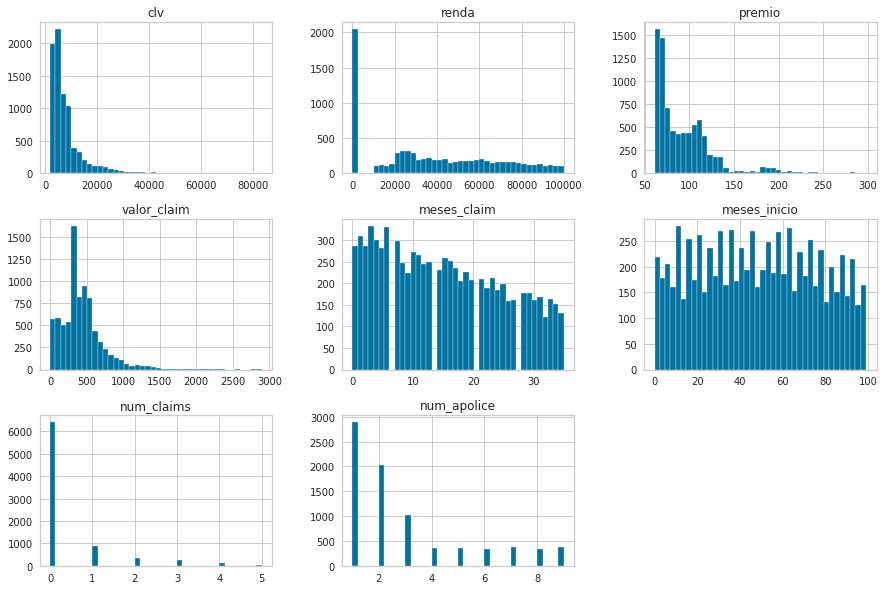

In [ ]:
df_EDA[numericos].hist(figsize=(15, 10), bins=40);

In [ ]:
# Teste de normalidade - Shapiro
for x in numericos:
    pvalor = stats.shapiro(df_EDA[x])[1]
    if (pvalor > 0.05):
        print(f'{x} segue distribuição normal, pois o p-valor igual a {pvalor}')
    else:
        print(f'{x} NÃO segue distribuição normal, pois o p-valor igual a {pvalor}')

clv NÃO segue distribuição normal, pois o p-valor igual a 0.0
renda NÃO segue distribuição normal, pois o p-valor igual a 0.0
premio NÃO segue distribuição normal, pois o p-valor igual a 0.0
valor_claim NÃO segue distribuição normal, pois o p-valor igual a 0.0
meses_claim NÃO segue distribuição normal, pois o p-valor igual a 0.0
meses_inicio NÃO segue distribuição normal, pois o p-valor igual a 1.3551957448485306e-41
num_claims NÃO segue distribuição normal, pois o p-valor igual a 0.0
num_apolice NÃO segue distribuição normal, pois o p-valor igual a 0.0


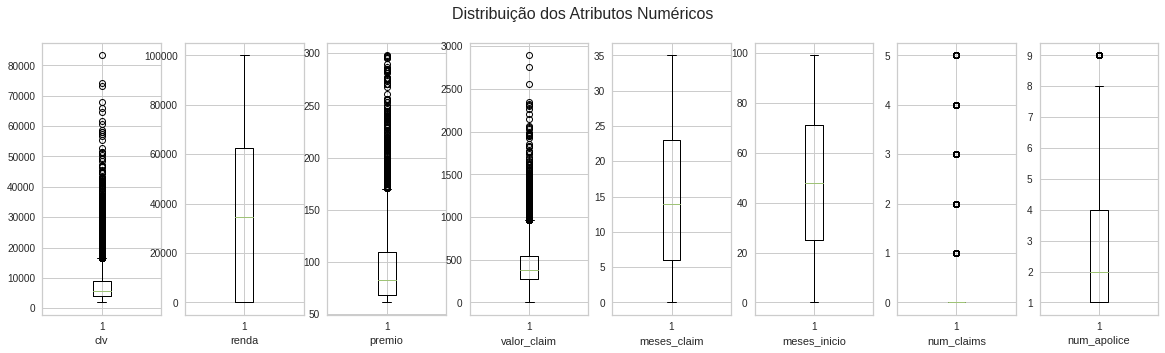

In [ ]:
fig,ax = plt.subplots(1,len(numericos),figsize = (20,5))

for i,val in enumerate(numericos):
  ax[i].boxplot(df_EDA[val])
  ax[i].set_xlabel(val)

fig.suptitle('Distribuição dos Atributos Numéricos', fontsize=16);

Nenhum dos atributos númericos segue distribuição normal, de acordo com o teste de Shapiro. O histograma e o boxplot nos mostram que os atributos 'clv', 'premio' e 'valor_claim' possuem outliers que causam um enviesamento significativo da distribuição dos valores com cauda à direita.

A maior parte dos clientes possui apenas uma apólice e nenhum requerimento/sinistro.

In [ ]:
df_EDA[df_EDA.renda==0][categoricos].describe()

,estado,resposta,cobertura,educacao,emprego,genero,local,est_civil,tipo_apolice,classe_apolice,oferta,canal,classe_veiculo,tam_veiculo
count,2041,2041,2041,2041,2041,2041,2041,2041,2041,2041,2041,2041,2041,2041
unique,5,2,3,5,1,2,3,3,3,9,4,4,6,3
top,Oregon,No,Basic,High School or Below,Unemployed,M,Suburban,Single,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,634,1860,1216,692,2041,1026,1863,1159,1532,796,1089,807,1024,1411


Um fato que chama a atenção na base e causa estranhamento inicial é uma grande parte dos clientes (2041 no total) aparecer com renda igual a zero. Ao analisar esse segmento, verifica-se que todos correspondem a pessoas desempregadas. No entanto, a maioria (1863) mora em zonas suburbanas que são bairros ricos nos EUA, e uma parte ainda cursa High School (692), ou seja ensino médio, e aproximadamente metade (1159) são casadas. Estes fatos levam a creer que são casos de pessoas que possuem carro, porém não tem renda devido a serem estudantes cuja renda vem dos pais ou ainda pessoas que dependem da renda do conjugue.

#### Atributos Categóricos

Para a análise univariada dos atributos categóricos serão utilizados gráficos de percentual de ocorrência e verificação da moda.

In [ ]:
df_EDA[categoricos].describe()

,estado,resposta,cobertura,educacao,emprego,genero,local,est_civil,tipo_apolice,classe_apolice,oferta,canal,classe_veiculo,tam_veiculo
count,8099,8099,8099,8099,8099,8099,8099,8099,8099,8099,8099,8099,8099,8099
unique,5,2,3,5,5,2,3,3,3,9,4,4,6,3
top,Oregon,No,Basic,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,2475,6926,4931,2430,5079,4164,5098,4728,6053,3140,3324,3087,4110,5671


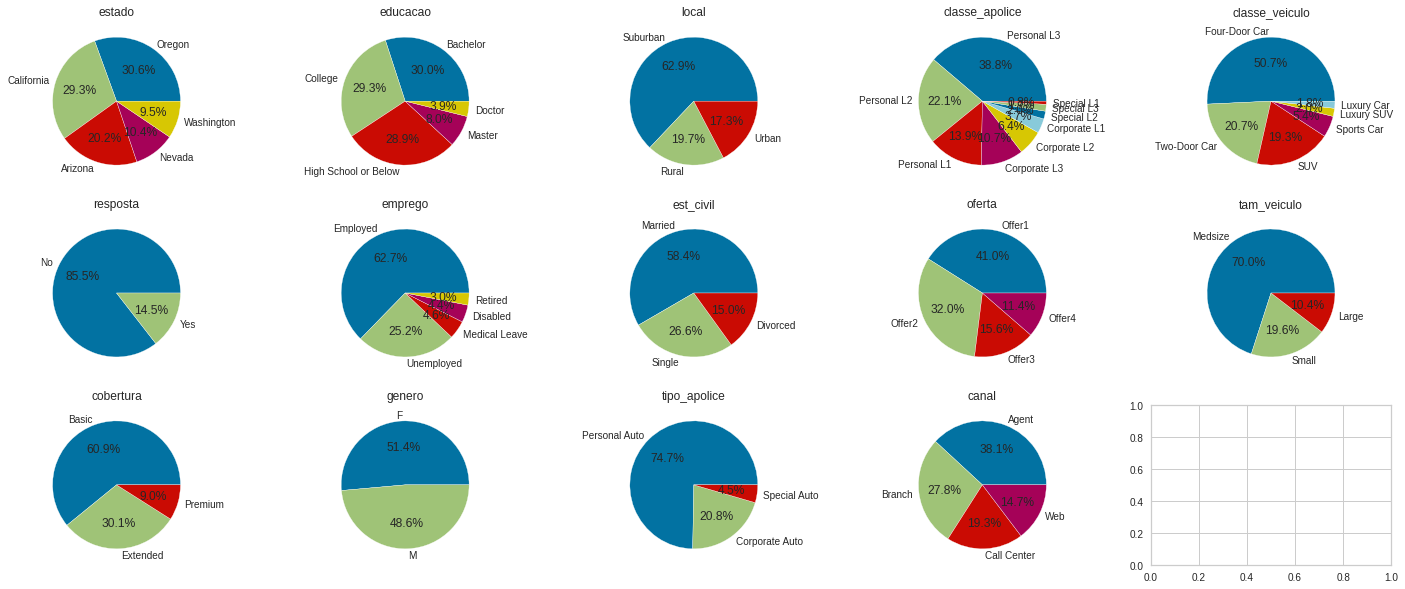

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(25, 10))

for i,val in enumerate(categoricos):
    df2 = df_EDA[val].value_counts(normalize=True)
    df2.plot(kind='pie',title=val, autopct ='%1.1f%%', ax=ax[i%3,i//3],ylabel='');

Os gráficos de setor acima nos permitem conhecer a distribuição de cada atributo categórico.

### Análise Multivariada

#### Atributos Numéricos x Numéricos

Será checada a dependência entre os atributos numéricos através da matriz de correlação. Como o atributo alvo é categórico, está análise verificará apenas se existe correlação entre os preditores.

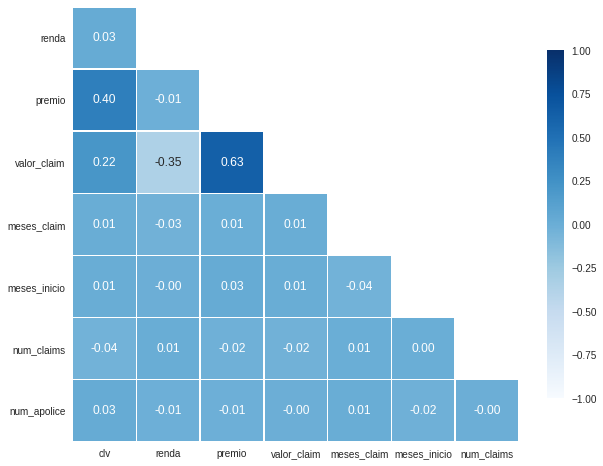

In [ ]:
#fig = plt.figure()
#fig.set_size_inches(7, 7)
#sns.heatmap(round(df_EDA[numericos].corr(),2), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',linewidths=.5);

df_corr = df_EDA[numericos].corr()
fig, ax = plt.subplots(figsize=(10, 8))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8},linewidths=.5)
# yticks
plt.yticks(rotation=0)
plt.show()

Os atributos numéricos com os quais a variável alvo 'clv' se correlaciona mais são: 'premio' e 'valor_claim' em ordem do coeficiente R, ainda assim, não são correlações consideradas fortes. No que diz respeito às relações entre as demais variáveis destaca-se a correlação entre 'valor_claim' com 'renda' e 'premio'.

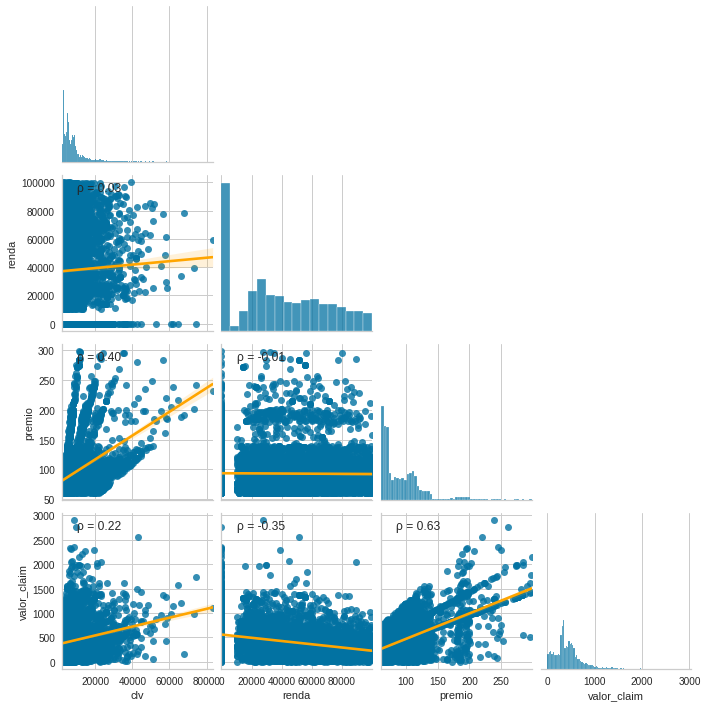

In [ ]:
# Dispersão e correlação
from scipy.stats import pearsonr

def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

%config InlineBackend.figure_format = 'png'
sns.pairplot(df_EDA[numericos_float], kind = "reg", corner = True, plot_kws={'line_kws':{'color':'orange'}}).map_lower(corrfunc);

Para o atributo 'premio' que é a que tem a maior correlação com o atributo alvo 'clv' verifica-se no gráfico de dispersão acima que parece haver pelo menos 4 retas com diferentes inclinações que se ajustam a um determinado subconjunto de dados. Provavelmente alguma outra variável, categórica ou numérica pode estar causando isso.

####Atributos Categóricos x Categóricos

A fim de facilitar a análise da relação da variável alvo 'clv' com as variáveis categóricas, vamos criar um atributo 'clv_cat' correpondendo a uma categorização desse atributo em clv baixo, médio, alto e muito alto.

In [ ]:
bins = [0,df_EDA.clv.quantile(q = 0.25),df_EDA.clv.quantile(q = 0.75),df_EDA.clv.quantile(q = 1)]
labels = ['baixo','medio','alto']
df_EDA['clv_cat'] = pd.cut(df_EDA.clv,bins=bins,labels=labels)

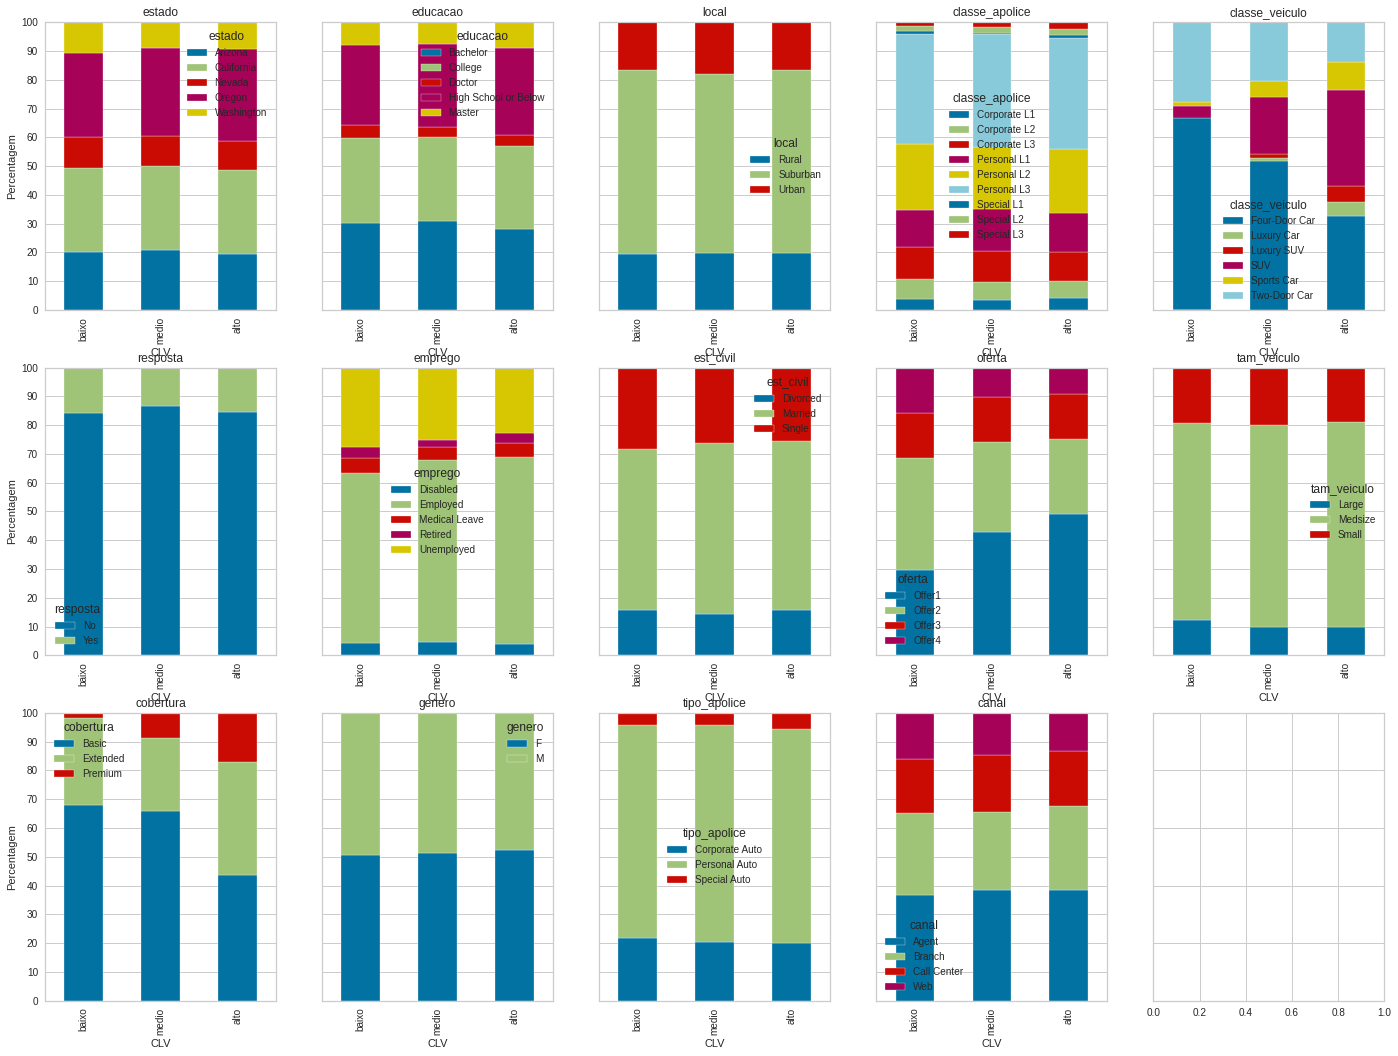

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=5,figsize=(24, 18))

for i,val in enumerate(categoricos):
  df2 = pd.crosstab(df_EDA[val], df_EDA.clv_cat, normalize= 'columns')*100
  df2.T.plot(kind='bar', stacked=True, title=val, xlabel='CLV',ylabel='Percentagem',
             ax=ax[i%3,i//3],sharey=True,ylim=(0,100),yticks=(range(0,101,10)))

Os gráficos acima indicam que as variáveis categóricas que impactam sobre a distribuição do clv são: 'classe_veiculo', 'oferta' e 'cobertura'.

#### Atributos Categóricos x Numéricos

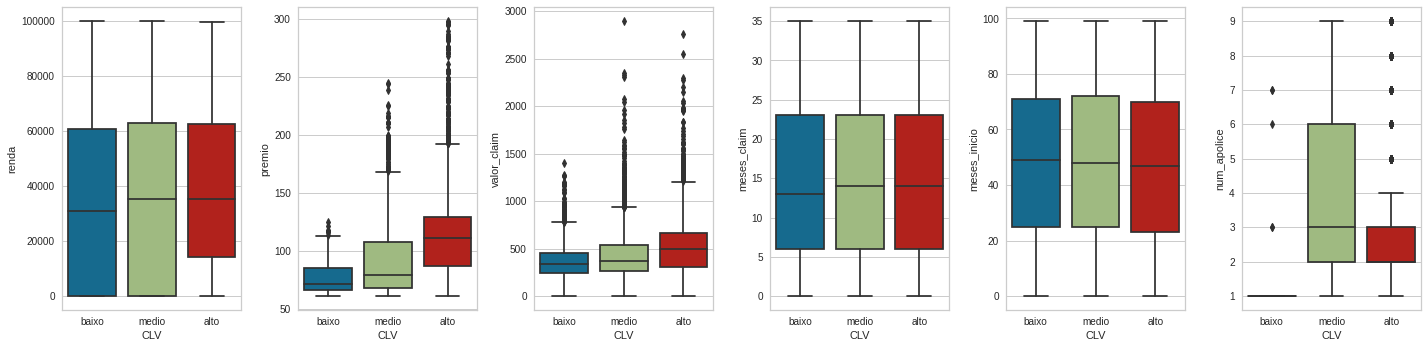

In [ ]:
numericos2 = ['renda','premio','valor_claim','meses_claim','meses_inicio','num_apolice']
fig, ax = plt.subplots(nrows=1, ncols=len(numericos2), figsize=(20, 5))
for i, val in enumerate(numericos2):
    sns.boxplot(x='clv_cat', y=val,data=df_EDA, ax=ax[i])
    ax[i].set_xlabel('CLV')
    ax[i].set_ylabel(val)
fig.tight_layout();

Os boxplots acima corroboram a matriz de correlação conforme esperado, ou seja, os atributos 'premio' e 'valor_claim' tem maior influência sobre o CLV.

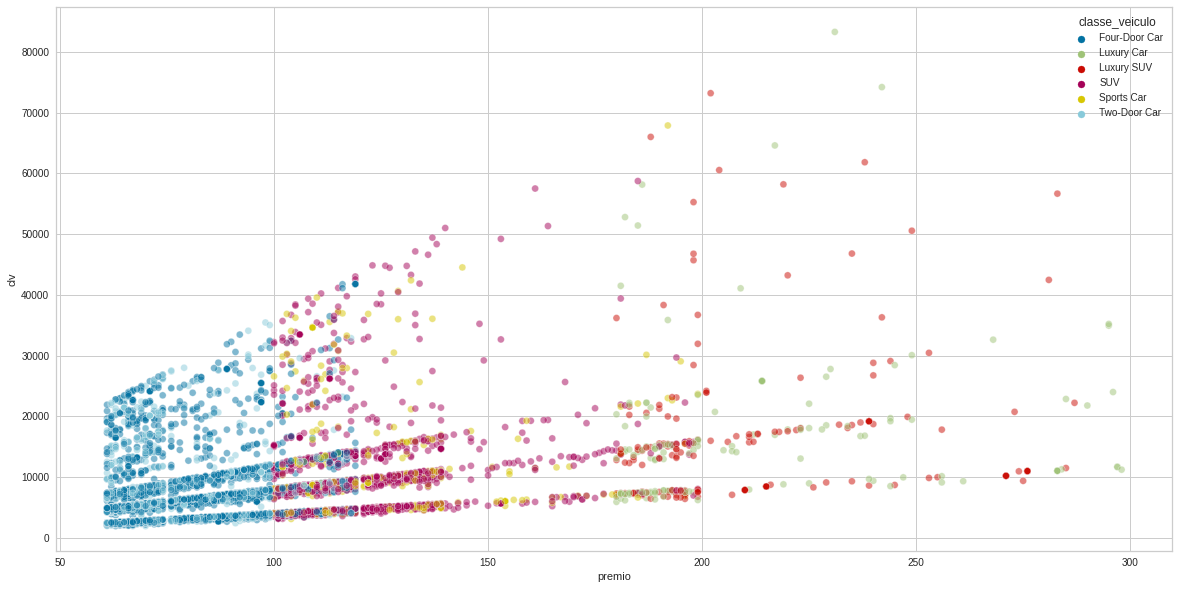

In [ ]:
fig=plt.figure(figsize=(20, 10))
sns.scatterplot(x='premio', y='clv', hue = 'classe_veiculo',alpha=0.5, data=df_EDA);

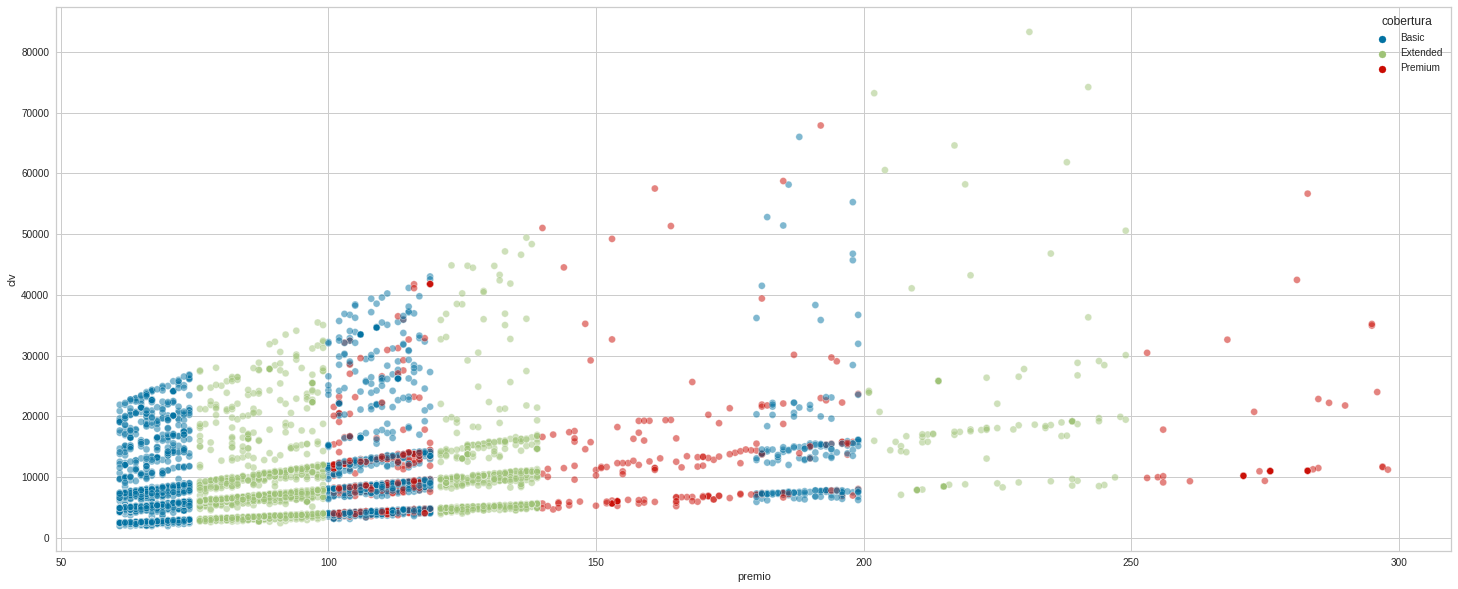

In [ ]:
fig=plt.figure(figsize=(25, 10))
sns.scatterplot(x='premio', y='clv', hue = 'cobertura',alpha=0.5, data=df_EDA);

### Principais Informações Obtidas do EDA

As seguintes informações obtidas no EDA são relevantes para uso no pré-processamento dos dados e elaboração do modelo preditivo.


* xxxxx

## PRÉ-PROCESSAMENTO DOS DADOS

Abaixo são aplicados os algorítmos Powertransformer e MinMaxScaler para normalização e escalonamento dos dados numéricos a fim de tornar-los mais adequados ao processamento pelos algorítmos de regressão e agrupamento que serão utilizados.

In [ ]:
df_pp = df.copy()

In [ ]:
#NORMALIZAÇÃO COM POWERTRANSFORMER
pt = PowerTransformer()
df_pp[numericos] = pt.fit_transform(df_pp[numericos])

#ESCALONAMENTO COM MINMAXSCALER
scaler = MinMaxScaler()
df_pp[numericos] = scaler.fit_transform(df_pp[numericos])

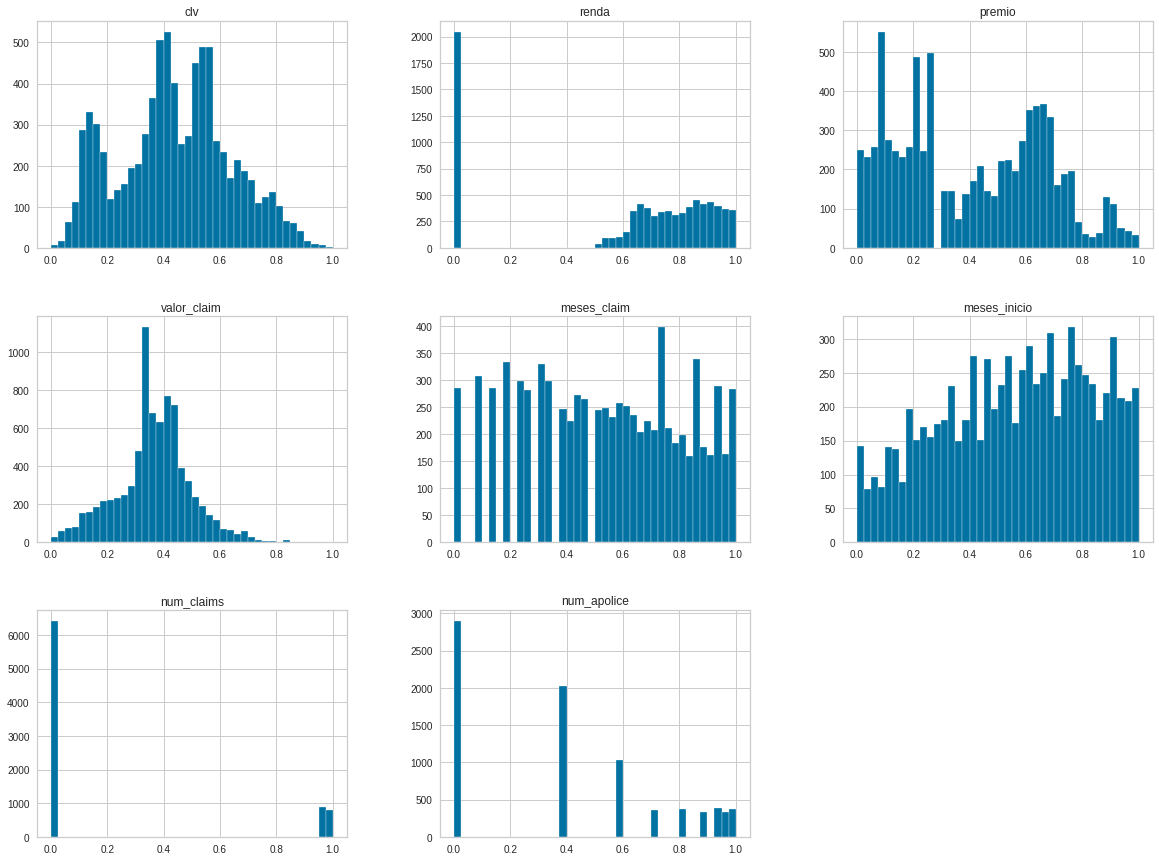

In [ ]:
df_pp[numericos].hist(figsize=(20, 15), bins=40, layout=(3, 3));

É possível verificar a distribuição dos atributos normalizados com os histogramas acima. Percebe-se que todos os atributos estão entre 0 e 1, necessário para aplicação das técnicas de agrupamento e regressão.

In [ ]:
df_pp[categoricos] = df_pp[categoricos].apply(lambda x: x.cat.codes)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

clustering = DBSCAN(eps=3, min_samples=2).fit(df_pp2.drop(['cliente','data_efetiva'],axis=1).values)

Estimated number of clusters: 0
Estimated number of noise points: 8099


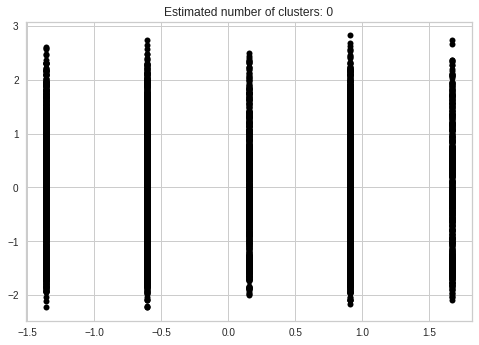

In [ ]:
X = StandardScaler().fit_transform(df_pp.drop(['cliente','data_efetiva'],axis=1).values)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"
#       % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels))
# print("Silhouette Coefficient: %0.3f"
#       % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

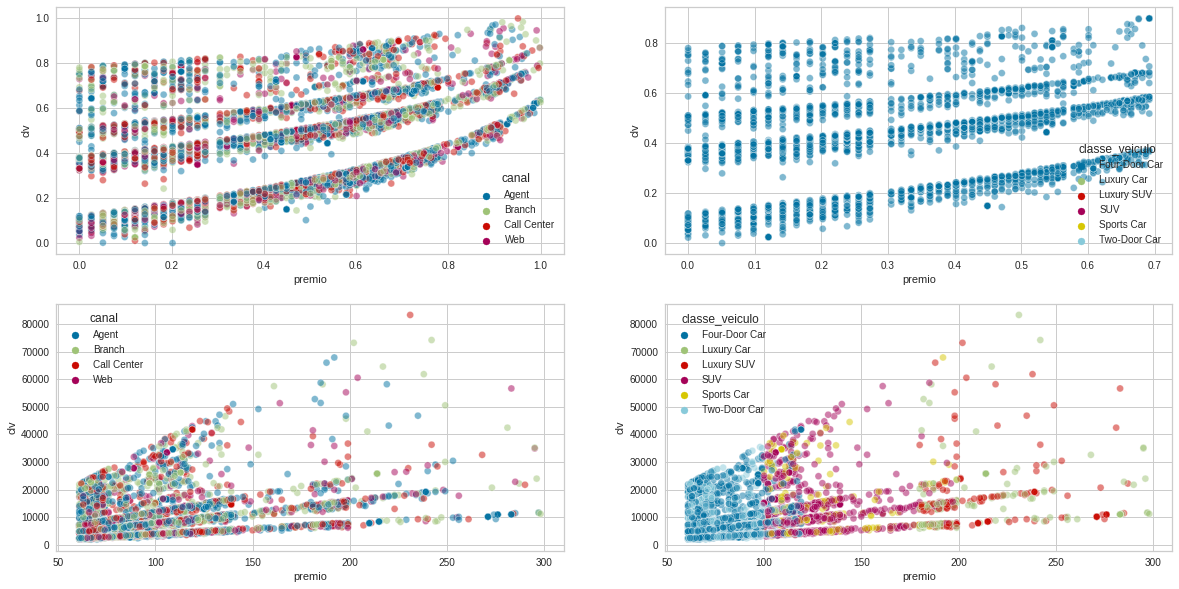

In [ ]:
fig,ax = plt.subplots(2,2,figsize=(20,10))

#COM NORMALIZAÇÃO E ESCALONAMENTO
sns.scatterplot(x='premio', y='clv',
                hue='canal',alpha=0.5,
                data=df_pp, ax = ax[0,0]);

sns.scatterplot(x='premio', y='clv',
                hue='classe_veiculo',alpha=0.5,
                data=df_pp[df_pp['classe_veiculo'] == 'Four-Door Car'], ax=ax[0,1]);

#SEM NORMALIZAÇÃO E ESCALONAMENTO
sns.scatterplot(x='premio', y='clv',
                hue='canal',alpha=0.5,
                data=df_EDA, ax = ax[1,0]);

sns.scatterplot(x='premio', y='clv',
                hue='classe_veiculo',alpha=0.5,
                data=df_EDA, ax=ax[1,1]);

Acima segue uma comparação dos gráficos de dispersão de alguns atributos da base de dados com e sem o efeito da normalização e escalonamento. Verifica-se que a normalização e escalonamento dos atributos contribui para deixar a relação entre os atributos mais linear e evidencia ainda mais que existem 4 curvas diferentes relacionando 'clv' com 'premio' e não são os atributos categóricos 'cobertura' e 'classe_veiculo' que estão diferenciando essas curvas, pois as 4 curvas não possuem elementos dessas categorias segregados. Esses dois atributos categóricos foram selecionados, pois na EDA foram aqueles que mais pareceram relacionar-se com o atributo alvo 'clv'.

Vamos codificar os atributos categóricos de modo a permitir que estejam no formato adequado para algorítmos de regressão, agrupamento e teste chi2.

In [ ]:
#CODIFICAÇÃO DOS ATRIBUTOS CATEGÓRICOS
df_pp2 = pd.get_dummies(df_pp,drop_first=True,columns=categoricos)

In [ ]:
df_pp2.head(3)

,cliente,clv,data_efetiva,renda,premio,meses_claim,meses_inicio,num_claims,num_apolice,valor_claim,estado_California,estado_Nevada,estado_Oregon,estado_Washington,resposta_Yes,cobertura_Extended,cobertura_Premium,educacao_College,educacao_Doctor,educacao_High School or Below,educacao_Master,emprego_Employed,emprego_Medical Leave,emprego_Retired,emprego_Unemployed,genero_M,local_Suburban,local_Urban,est_civil_Married,est_civil_Single,tipo_apolice_Personal Auto,tipo_apolice_Special Auto,classe_apolice_Corporate L2,classe_apolice_Corporate L3,classe_apolice_Personal L1,classe_apolice_Personal L2,classe_apolice_Personal L3,classe_apolice_Special L1,classe_apolice_Special L2,classe_apolice_Special L3,oferta_Offer2,oferta_Offer3,oferta_Offer4,canal_Branch,canal_Call Center,canal_Web,classe_veiculo_Luxury Car,classe_veiculo_Luxury SUV,classe_veiculo_SUV,classe_veiculo_Sports Car,classe_veiculo_Two-Door Car,tam_veiculo_Medsize,tam_veiculo_Small
0,BU79786,0.17,2011-02-24,0.85,0.18,0.95,0.10,0.0,0.00,0.37,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,QZ44356,0.50,2011-01-31,0.00,0.52,0.53,0.53,0.0,0.97,0.63,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,AI49188,0.66,2011-02-19,0.81,0.63,0.66,0.49,0.0,0.39,0.45,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


Podemos agora utilizar o teste chi2 para identificar os atributos categóricos mais correlacionadas com o 'clv'.

In [ ]:
categoricos2 = ['estado_California', 'estado_Nevada', 'estado_Oregon',
       'estado_Washington', 'resposta_Yes', 'cobertura_Extended',
       'cobertura_Premium', 'educacao_College', 'educacao_Doctor',
       'educacao_High School or Below', 'educacao_Master', 'emprego_Employed',
       'emprego_Medical Leave', 'emprego_Retired', 'emprego_Unemployed',
       'genero_M', 'local_Suburban', 'local_Urban', 'est_civil_Married',
       'est_civil_Single', 'tipo_apolice_Personal Auto',
       'tipo_apolice_Special Auto', 'classe_apolice_Corporate L2',
       'classe_apolice_Corporate L3', 'classe_apolice_Personal L1',
       'classe_apolice_Personal L2', 'classe_apolice_Personal L3',
       'classe_apolice_Special L1', 'classe_apolice_Special L2',
       'classe_apolice_Special L3', 'oferta_Offer2', 'oferta_Offer3',
       'oferta_Offer4', 'canal_Branch', 'canal_Call Center', 'canal_Web',
       'classe_veiculo_Luxury Car', 'classe_veiculo_Luxury SUV',
       'classe_veiculo_SUV', 'classe_veiculo_Sports Car',
       'classe_veiculo_Two-Door Car', 'tam_veiculo_Medsize',
       'tam_veiculo_Small']

df_pp2['clv_cat'] = df_EDA.clv_cat.map({'baixo':1,'medio':2,'alto':3})
df_pp2['clv_cat']  = df_pp2['clv_cat'] .astype('int64')

Abaixo segue lista dos atributos que mais influenciam no CLV de acordo com o teste chi2.

In [ ]:
from sklearn.feature_selection import chi2
X = df_pp2[categoricos2]
y = df_pp2['clv_cat']
categoricos_chi2 = chi2(X, y)
indices = np.argsort(categoricos_chi2[0])[::-1]
categoricos_nomes = np.array(categoricos2)[indices]
categoricos_nomes

array(['classe_veiculo_SUV', 'cobertura_Premium',
       'classe_veiculo_Luxury SUV', 'classe_veiculo_Luxury Car',
       'classe_veiculo_Sports Car', 'classe_veiculo_Two-Door Car',
       'cobertura_Extended', 'oferta_Offer2', 'oferta_Offer4',
       'emprego_Unemployed', 'classe_apolice_Special L3', 'resposta_Yes',
       'emprego_Employed', 'emprego_Retired', 'tipo_apolice_Special Auto',
       'estado_Washington', 'canal_Web', 'classe_apolice_Special L1',
       'educacao_Master', 'classe_apolice_Personal L1',
       'est_civil_Single', 'estado_Oregon', 'emprego_Medical Leave',
       'educacao_Doctor', 'educacao_High School or Below',
       'est_civil_Married', 'canal_Branch', 'local_Urban',
       'classe_apolice_Corporate L2', 'classe_apolice_Special L2',
       'tam_veiculo_Medsize', 'tam_veiculo_Small', 'genero_M',
       'classe_apolice_Corporate L3', 'estado_Nevada',
       'classe_apolice_Personal L2', 'canal_Call Center',
       'local_Suburban', 'tipo_apolice_Personal Au

## MODELO DE AGRUPAMENTO - ==== DEU RUIM !!!

Inicialmente deve ser determinado o número de clusters a ser adotado. Para isso será empregado o método do cotovelo usando como métrica a inércia (distortion), a fim de nortear o número de clusters a ser utilizado. Como método de inicialização dos centróides será utilizado o K-Means++, por apresentar técnica de inicialização aleatória otimizada dos centróides, ao reduzir a possibilidade de sobreposição inicial dos mesmos. O modelo baseline utilizará todos os atributos disponíveis na base, exceto 'cliente','data_efetiva' e 'oferta' sem nenhuma manipulação adicional à normalização e escalonamento realizados na etapa anterior. O descarte do atributo oferta deve-se ao objetivo de comparar posteriormente se os seguros ofertados estão de acordo com a segmentação dos clientes indicada pelos clusters.

In [ ]:
X = df_pp2.drop(['cliente','data_efetiva','oferta_Offer2','oferta_Offer3','oferta_Offer4'],axis=1)

In [ ]:
def plot_kmeans(cluster_centers, y_km, X):
    # X=X.values
    # plot
    plt.figure(figsize=(10, 10))
    plt.scatter(
        X[y_km == 0, 0], X[y_km == 0, 1],
        s=50, c='lightgreen',
        marker='s', edgecolor='black',
        label='cluster 1'
    )
    plt.scatter(
        X[y_km == 1, 0], X[y_km == 1, 1],
        s=50, c='orange',
        marker='o', edgecolor='black',
        label='cluster 2'
    )
    plt.scatter(
        X[y_km == 2, 0], X[y_km == 2, 1],
        s=50, c='lightblue',
        marker='v', edgecolor='black',
        label='cluster 3'
    )
    # plt.scatter(
    #     X[y_km == 3, 0], X[y_km == 3, 1],
    #     s=50, c='m',
    #     marker="P", edgecolor='black',
    #     label='cluster 4'
    # )
    plt.scatter(
        cluster_centers[:, 0], cluster_centers[:, 1],
        s=250, marker='*',
        c='red', edgecolor='black',
        label='centroids'
    )
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
    #treino
pca.fit(X )
principalDf = pd.DataFrame(data = pca.transform(X ) , columns = ['principal component 1', 'principal component 2'])

In [ ]:
print(pca.explained_variance_)
print(2.51618436 / (2.51618436+ 2.05452623))

[3.21448267 2.09202937]
0.5505017897009313


In [ ]:
pca.explained_variance_ratio_

array([0.13974286, 0.09094657])

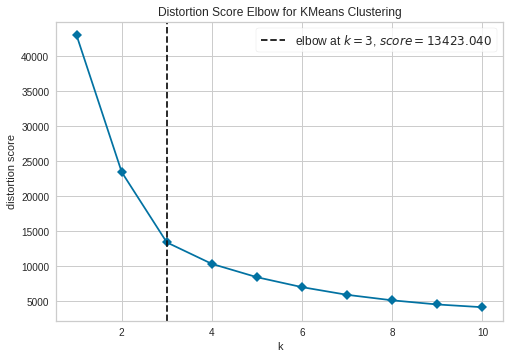

In [ ]:
#MÉTODO DO COTOVELO - MÉTRICA = DISTORTION = INÉRCIA

# Instantiate a scikit-learn K-Means model
model = KMeans(
    init='k-means++',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(1,11), metric='distortion', timings=False)

# Fit the data and visualize
visualizer.fit(principalDf)
visualizer.poof()

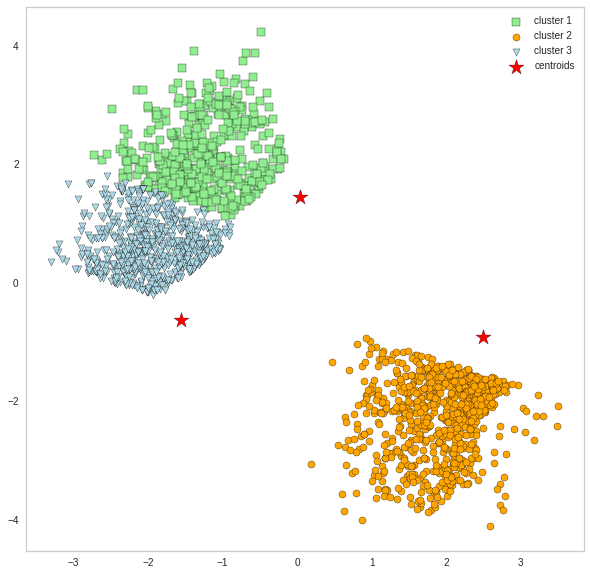

In [ ]:
kmeans = KMeans(n_clusters = 3, init='k-means++',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
)
kmeans.fit(principalDf)
y_Kmeans = model.predict(principalDf)

plot_kmeans(kmeans.cluster_centers_, y_Kmeans, principalDf.values)

In [ ]:
#AGRUPAMENTO BASELINE

#RODANDO KMEANS

km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

#ATUALIZANDO DATAFRAMES COM CLUSTERS
df_EDA['Grupo_km'] = y_km
df_pp['Grupo_km'] = y_km
df_pp2['Grupo_km'] = y_km
df_EDA.Grupo_km= df_EDA.Grupo_km.astype('category')
df_pp.Grupo_km= df_pp.Grupo_km.astype('category')
df_pp2.Grupo_km= df_pp.Grupo_km.astype('category')

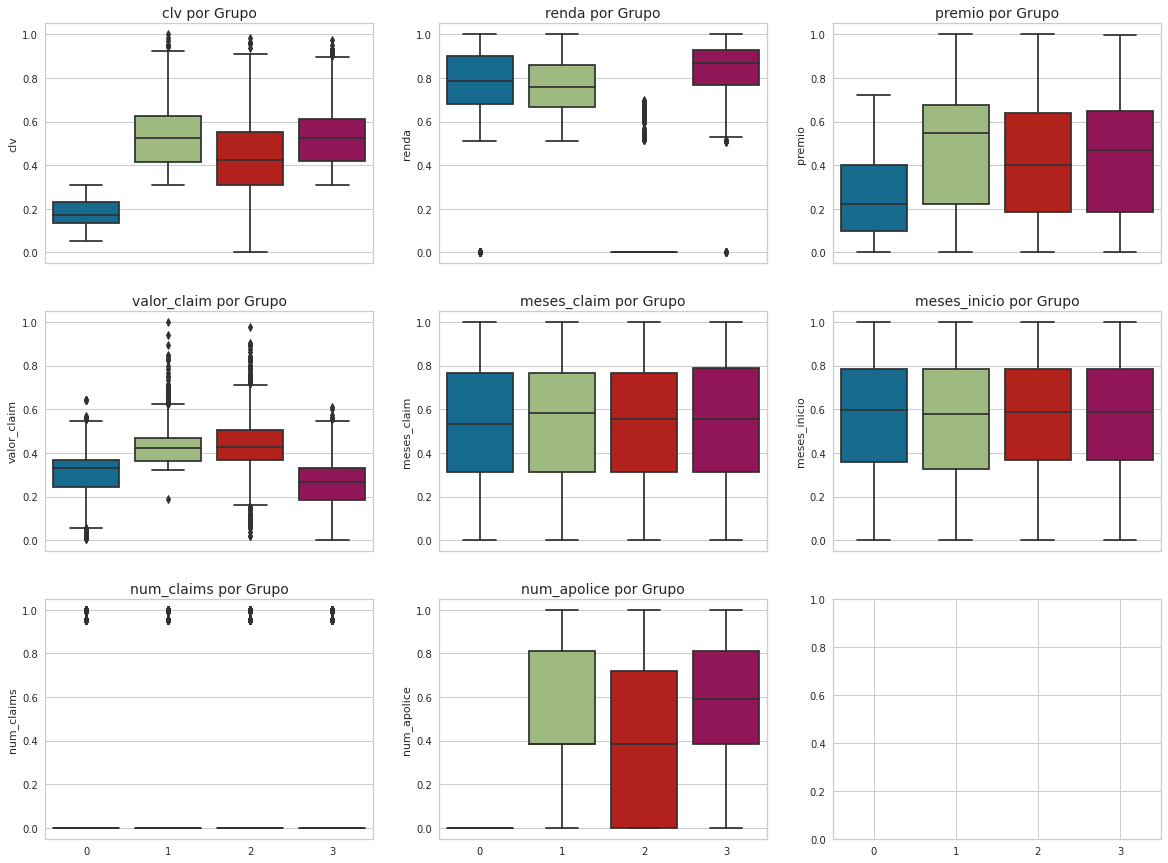

In [ ]:
#BOXPLOTS
fig,ax = plt.subplots(3,3,figsize = (20,15),sharex=True)

for i,atrib in enumerate(numericos):
  l,c = i//3, i%3
  sns.boxplot(x='Grupo_km', y=atrib,data=df_pp2,ax=ax[l,c])
  ax[l,c].set_title(str(atrib)+' por Grupo', fontsize=14);
  ax[l,c].set_xlabel('');

In [ ]:
categoricos3 = ['classe_veiculo_SUV', 'cobertura_Premium',
       'classe_veiculo_Luxury SUV', 'classe_veiculo_Luxury Car',
       'classe_veiculo_Sports Car']

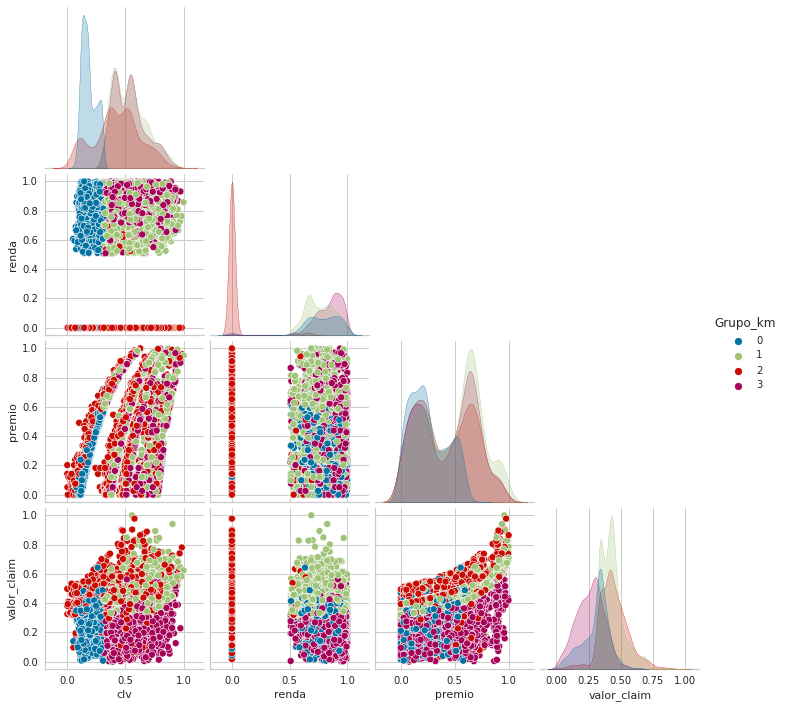

In [ ]:
sns.pairplot(df_pp2[numericos_float + ['Grupo_km']],hue='Grupo_km',corner=True)

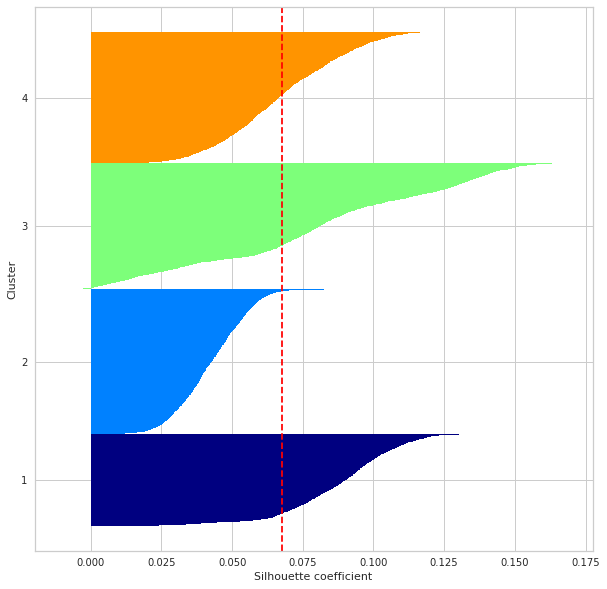

In [ ]:
#GRÁFICO DE SILHUETA

# find cluster labels and number of clusters
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

# calculate silhouettes
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

# plot silhouette
plt.figure(figsize=(10, 10))
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(
        range(y_ax_lower, y_ax_upper),
        c_silhouette_vals,
        height=1.0, edgecolor='none',
        color=color
     )
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

# calculate silhouette score
silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

## MODELO DE REGRESSÃO LINEAR

### Regressão Linear Simples

In [ ]:
df_rsimples = pd.DataFrame([],columns=['atributo','slope','intercept','pvalor','R','R2'])

for i, atributo in enumerate(list(df_pp2.drop(['cliente','clv','data_efetiva','clv_cat'],axis=1).columns)):
  m = stats.linregress(df_pp2[atributo], df_pp2['clv'])
  df_rsimples.loc[i]=[atributo,m.slope,m.intercept,m.pvalue,m.rvalue,m.rvalue**2]

df_rsimples.sort_values(by='R',ascending=False,inplace=True)
df_rsimples.reset_index(drop=True,inplace=True)
df_rsimples.head(10)

,atributo,slope,intercept,pvalor,R,R2
0,num_apolice,0.27,0.33,0.00e+00,0.48,2.27e-01
1,premio,0.35,0.30,0.00e+00,0.47,2.16e-01
2,classe_veiculo_SUV,0.12,0.42,1.59e-107,0.24,5.82e-02
3,valor_claim,0.31,0.33,7.93e-78,0.21,4.22e-02
4,cobertura_Premium,0.12,0.43,3.12e-55,0.17,2.98e-02
5,classe_veiculo_Luxury SUV,0.23,0.44,2.33e-52,0.17,2.82e-02
6,classe_veiculo_Luxury Car,0.23,0.44,4.13e-45,0.16,2.42e-02
7,classe_veiculo_Sports Car,0.11,0.44,7.11e-28,0.12,1.47e-02
8,cobertura_Extended,0.05,0.43,7.94e-27,0.12,1.41e-02
9,emprego_Employed,0.03,0.42,7.15e-10,0.07,4.68e-03


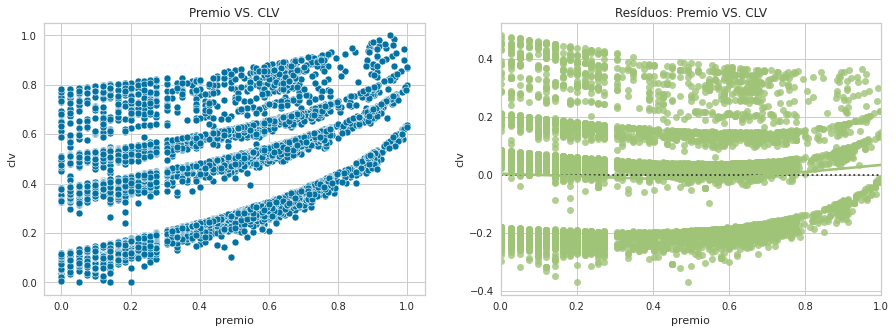

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,5))

#Gráfico de dispersão entre premio e clv
sns.scatterplot(x='premio', y='clv', data=df_pp2, ax = ax[0]);
ax[0].set_title("Premio VS. CLV");

# Gráfico de resíduos entre premio e clv
sns.residplot(x='premio', y='clv', data=df_pp2, ax = ax[1], lowess=True, color="g")
ax[1].set_title("Resíduos: Premio VS. CLV");

### Regressão Linear Múltipla

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# R^2 e R^2 ajustado para um modelo com 3 preditores
m = LinearRegression()
regressores=['num_apolice','premio', 'classe_veiculo_SUV','valor_claim','cobertura_Premium']
X = df_pp2[regressores]
y = df_pp2['clv']
m.fit(X, y)
ypred = m.predict(X)
r2prime = r2_score(y, ypred)

print("R^2:",r2prime)
print("R^2 Adjusted:",1-(1-r2prime)*(len(X)-1)/(len(X)-len(regressores)-1))

R^2: 0.44660438265787217
R^2 Adjusted: 0.44626248495779675
